In [1]:
import numpy as np

In [10]:
X = np.linspace(1, 20, 40)

In [22]:
y = X * 4 + np.random.normal(0, 3, 40)

In [23]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

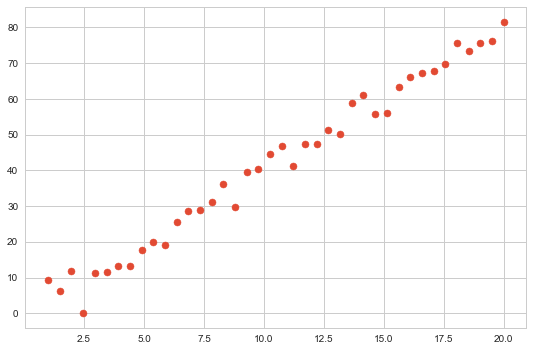

In [67]:
plt.scatter(X, y)

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [33]:
X = X.reshape(-1, 1)

In [34]:
model.fit(X, y)

LinearRegression()

In [36]:
model.coef_, model.intercept_

(array([4.08092006]), -1.086289659797714)

In [41]:
x1, x2 = 1, 20
y1, y2 = model.predict([[x1], [x2]])

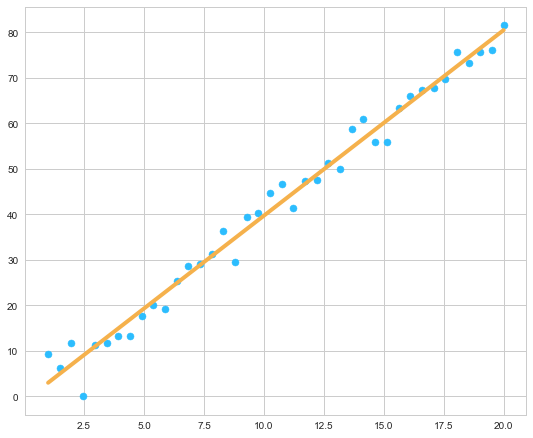

In [66]:
plt.figure(figsize=(8, 7))
plt.plot([x1, x2], [y1, y2], c='#F5B14C')
plt.scatter(X, y, c='#2CBDFE')
plt.grid(True)

In [70]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=2)
ridge_model.fit(X, y)

Ridge(alpha=2)

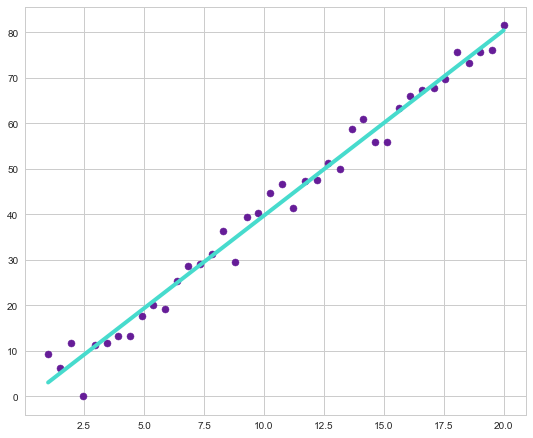

In [71]:
y3, y4 = ridge_model.predict([[x1], [x2]])
plt.figure(figsize=(8, 7))
plt.plot([x1, x2], [y3, y4], c='#47DBCD')
plt.scatter(X, y, c='#661D98')
plt.grid(True)

In [149]:
X1 = np.array([1.0, 1.0]) + np.random.normal(0, 2, size=(40, 2))
X2 = np.array([10.0, 10.0]) + np.random.normal(0, 2, size=(40, 2))

In [150]:
X = np.concatenate((X1, X2), axis=0)

In [151]:
y1 = np.ones(40)
y2 = np.zeros(40)
y = np.concatenate((y1, y2),axis=0)

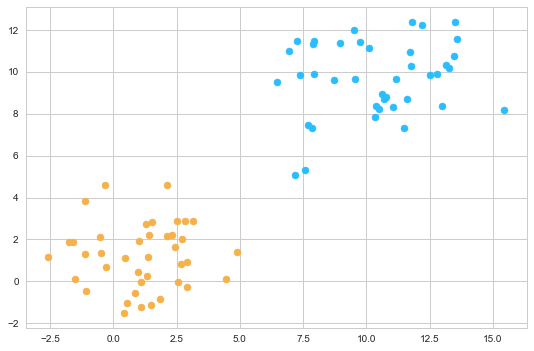

In [152]:
plt.scatter(X1[:, 0], X1[:, -1], c='#F5B14C')
plt.scatter(X2[:, 0], X2[:, -1], c='#2CBDFE')

In [153]:
shuffle = np.random.permutation(80)
shuffle

array([26, 51,  9, 46, 34, 16, 77, 56, 61, 21, 28, 49, 57, 31, 76, 10,  6,
       64, 38, 71, 48, 35, 47, 20, 53, 12, 14, 13,  4,  1, 69, 74, 42, 63,
       19, 55, 37, 59, 52, 33, 75, 41, 60, 30,  2, 70, 27, 25, 23, 54, 67,
       22,  5, 44,  0, 18, 66, 65, 72, 45,  7, 39, 78, 58, 36, 24, 79, 50,
       40, 17, 43,  8, 11,  3, 73, 15, 32, 29, 68, 62])

In [154]:
X = X[shuffle]
y = y[shuffle]

In [162]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X, y)

LogisticRegression()

In [163]:
logistic_model.coef_, logistic_model.intercept_

(array([[-0.98398157, -0.76311136]]), array([8.8777731]))

In [157]:
a = np.arange(-3, 16, 0.025)
b = np.arange(-2, 13, 0.025)

In [158]:
A, B = np.meshgrid(a, b)
A_flat = A.reshape(-1, 1)
B_flat = B.reshape(-1, 1)

In [159]:
AB = np.concatenate((A_flat, B_flat), axis=1)

In [160]:
Z = logistic_model.predict(AB)

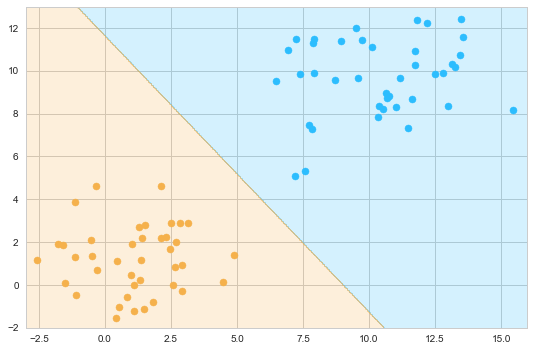

In [161]:
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#2CBDFE','#F5B14C'])
plt.scatter(X1[:, 0], X1[:, -1], c='#F5B14C')
plt.scatter(X2[:, 0], X2[:, -1], c='#2CBDFE')
plt.contourf(A, B, Z.reshape(A.shape), cmap=custom_cmap, alpha=0.2)

In [164]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X, y)

SVC()

In [168]:
svc_model.dual_coef_

array([[-0.39813256, -1.        , -0.15164946, -0.25135387, -1.        ,
         0.11985705,  0.33732287,  1.        ,  1.        ,  0.34395597]])

In [169]:
Z = svc_model.predict(AB)

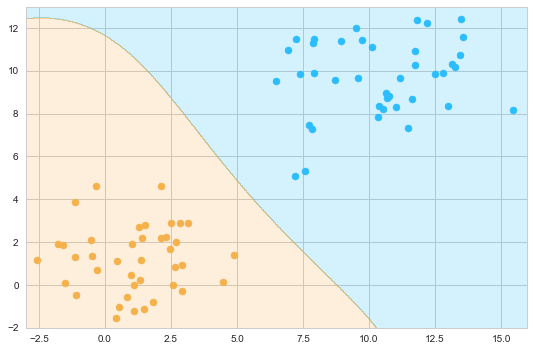

In [170]:
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#2CBDFE','#F5B14C'])
plt.scatter(X1[:, 0], X1[:, -1], c='#F5B14C')
plt.scatter(X2[:, 0], X2[:, -1], c='#2CBDFE')
plt.contourf(A, B, Z.reshape(A.shape), cmap=custom_cmap, alpha=0.2)

In [211]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
X, y = load_iris(return_X_y=True)
X = X[:, 2:]

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

In [213]:
from sklearn.naive_bayes import GaussianNB
gauss_model = GaussianNB()
gauss_model.fit(X_train, y_train)

GaussianNB()

In [214]:
gauss_model.score(X_test, y_test)

0.9666666666666667

In [252]:
from sklearn.tree import DecisionTreeClassifier
d_tree_cls = DecisionTreeClassifier(min_samples_leaf=4)
d_tree_cls.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=4)

In [253]:
d_tree_cls.score(X_test, y_test)

0.9

[Text(187.92, 280.665, 'X[0] <= 2.45\ngini = 0.665\nsamples = 120\nvalue = [43, 41, 36]'),
 Text(125.27999999999999, 200.47500000000002, 'gini = 0.0\nsamples = 43\nvalue = [43, 0, 0]'),
 Text(250.55999999999997, 200.47500000000002, 'X[0] <= 4.85\ngini = 0.498\nsamples = 77\nvalue = [0, 41, 36]'),
 Text(125.27999999999999, 120.28500000000003, 'X[1] <= 1.55\ngini = 0.093\nsamples = 41\nvalue = [0, 39, 2]'),
 Text(62.63999999999999, 40.09500000000003, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(187.92, 40.09500000000003, 'gini = 0.48\nsamples = 5\nvalue = [0, 3, 2]'),
 Text(375.84, 120.28500000000003, 'X[1] <= 1.75\ngini = 0.105\nsamples = 36\nvalue = [0, 2, 34]'),
 Text(313.2, 40.09500000000003, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(438.47999999999996, 40.09500000000003, 'gini = 0.0\nsamples = 30\nvalue = [0, 0, 30]')]

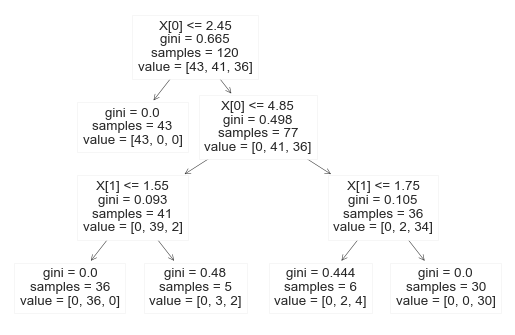

In [254]:
from sklearn import tree
tree.plot_tree(d_tree_cls)

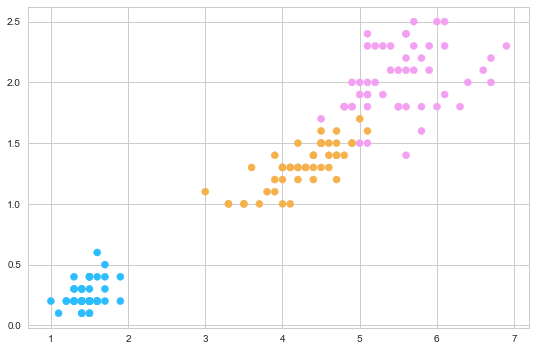

In [227]:
custom_cmap = ListedColormap(['#2CBDFE','#F5B14C', '#F3A0F2'])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=custom_cmap)

In [229]:
a = np.arange(0, 7, 0.025)
b = np.arange(0, 3, 0.025)
A, B = np.meshgrid(a, b)

In [237]:
A_flat = A.reshape(-1, 1)
B_flat = B.reshape(-1, 1)
AB = np.concatenate([A_flat, B_flat], axis=1)

In [256]:
Z = d_tree_cls.predict(AB)

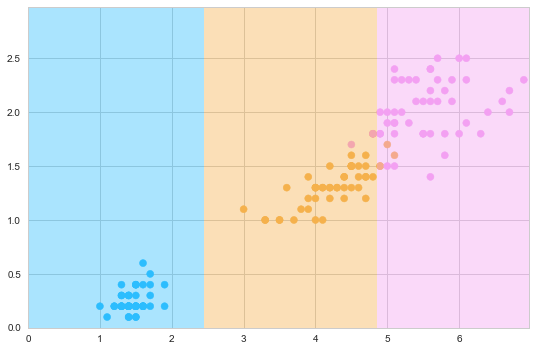

In [257]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=custom_cmap)
plt.contourf(A, B, Z.reshape(A.shape), cmap=custom_cmap, alpha=0.4)

In [291]:
from sklearn.datasets import make_classification, make_moons, make_circles
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(n_samples=500, noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

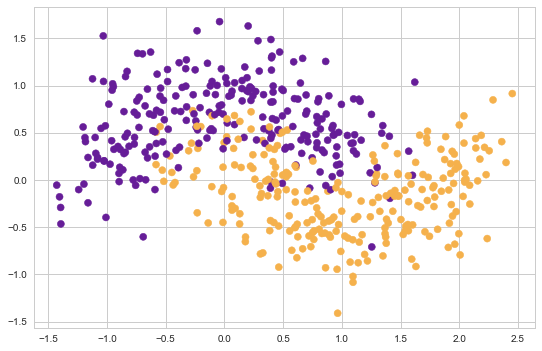

In [292]:
moons = datasets[0]
X, y = moons
plt.scatter(X[:,0], X[:, 1], c=y, cmap=ListedColormap(['#661D98', '#F5B14C']))

In [293]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(DecisionTreeClassifier(),
                            n_estimators=500,
                            max_samples=100,
                            bootstrap=True,
                            n_jobs=-1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1)

In [294]:
bag_clf.score(X_test, y_test)

0.88

In [297]:
a = np.arange(-2, 3, 0.025)
b = np.arange(-2, 2, 0.025)
A, B = np.meshgrid(a, b)
A_flat = A.reshape(-1, 1)
B_flat = B.reshape(-1, 1)
AB = np.concatenate([A_flat, B_flat], axis=1)
Z = bag_clf.predict(AB)

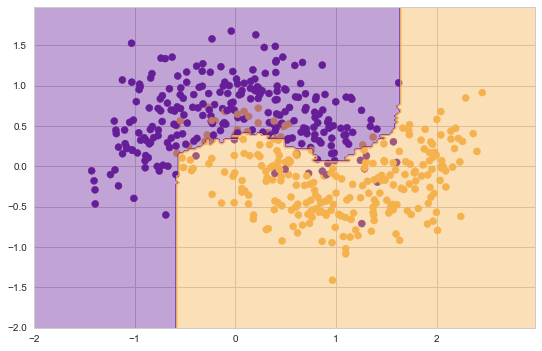

In [298]:
plt.scatter(X[:,0], X[:, 1], c=y, cmap=ListedColormap(['#661D98', '#F5B14C']))
plt.contourf(A, B, Z.reshape(A.shape), cmap=ListedColormap(['#661D98', '#F5B14C']), alpha=0.4)

In [299]:
d_tree_clf = DecisionTreeClassifier()
d_tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

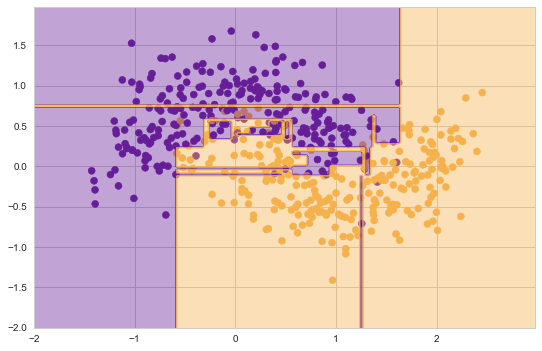

In [300]:
Z = d_tree_clf.predict(AB)
plt.scatter(X[:,0], X[:, 1], c=y, cmap=ListedColormap(['#661D98', '#F5B14C']))
plt.contourf(A, B, Z.reshape(A.shape), cmap=ListedColormap(['#661D98', '#F5B14C']), alpha=0.4)

In [301]:
from sklearn.ensemble import ExtraTreesClassifier
extra_tree_clf = ExtraTreesClassifier(n_estimators=500, max_samples=100, n_jobs=-1)
extra_tree_clf.fit(X_train, y_train)

ExtraTreesClassifier(max_samples=100, n_estimators=500, n_jobs=-1)

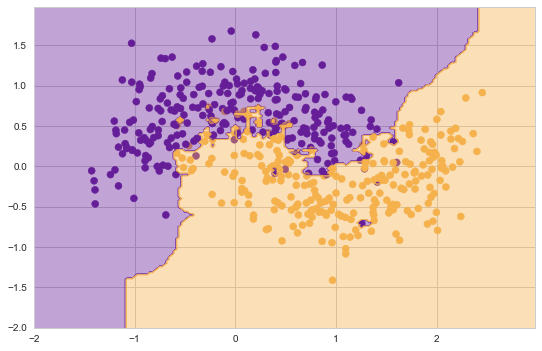

In [302]:
Z = extra_tree_clf.predict(AB)
plt.scatter(X[:,0], X[:, 1], c=y, cmap=ListedColormap(['#661D98', '#F5B14C']))
plt.contourf(A, B, Z.reshape(A.shape), cmap=ListedColormap(['#661D98', '#F5B14C']), alpha=0.4)

In [316]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                             n_estimators=200,
                             algorithm='SAMME.R',
                            learning_rate=0.1)

In [317]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, n_estimators=200)

In [318]:
ada_clf.score(X_test, y_test)

0.9

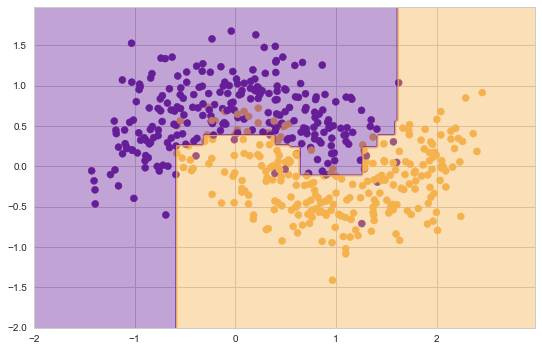

In [319]:
Z = ada_clf.predict(AB)
plt.scatter(X[:,0], X[:, 1], c=y, cmap=ListedColormap(['#661D98', '#F5B14C']))
plt.contourf(A, B, Z.reshape(A.shape), cmap=ListedColormap(['#661D98', '#F5B14C']), alpha=0.4)